# Laboratory exercise 2
https://github.com/koroteevmv/ML_course/blob/main/ML1.1%20linear%20regression/README.md

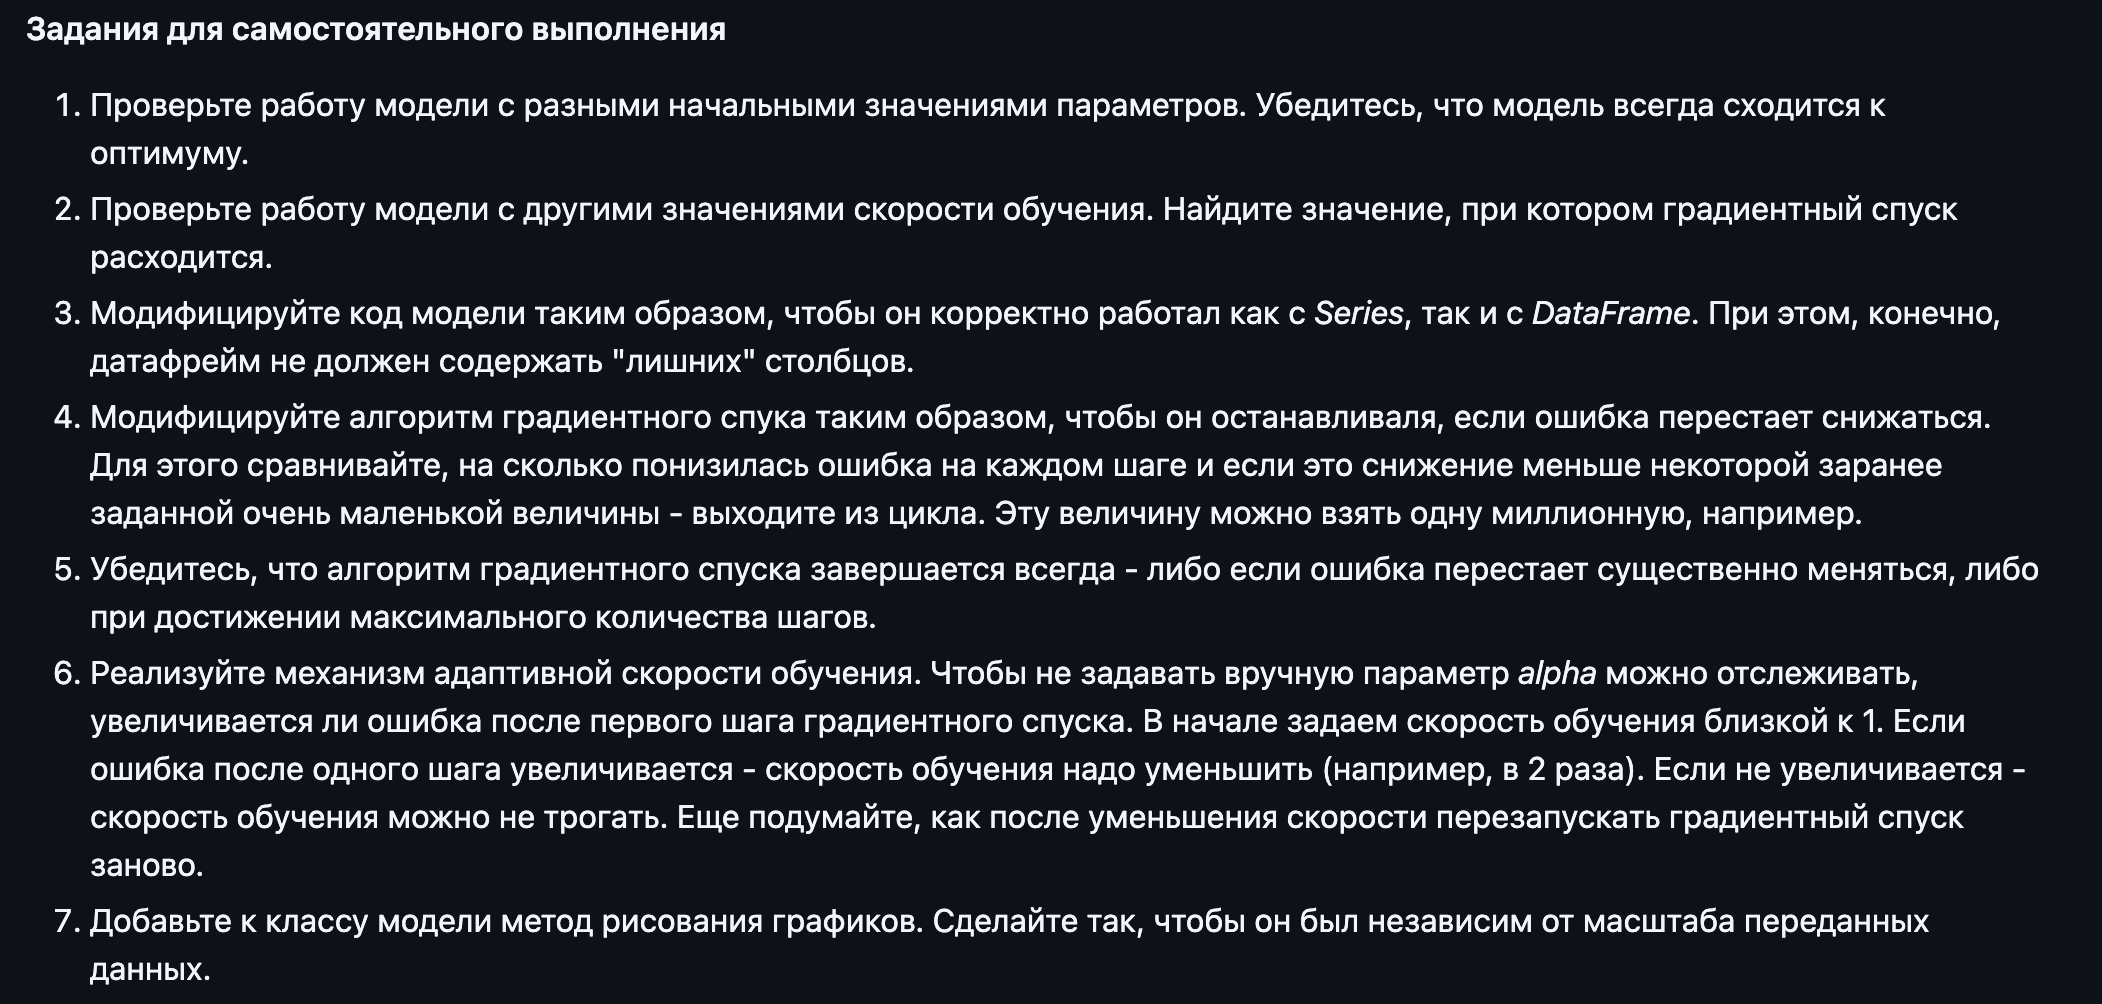

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 

In [3]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

print("Первые 5 значений x:")
print(x.head())
print("\nПервые 5 значений y:")
print(y.head())

Первые 5 значений x:
0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

Первые 5 значений y:
0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64


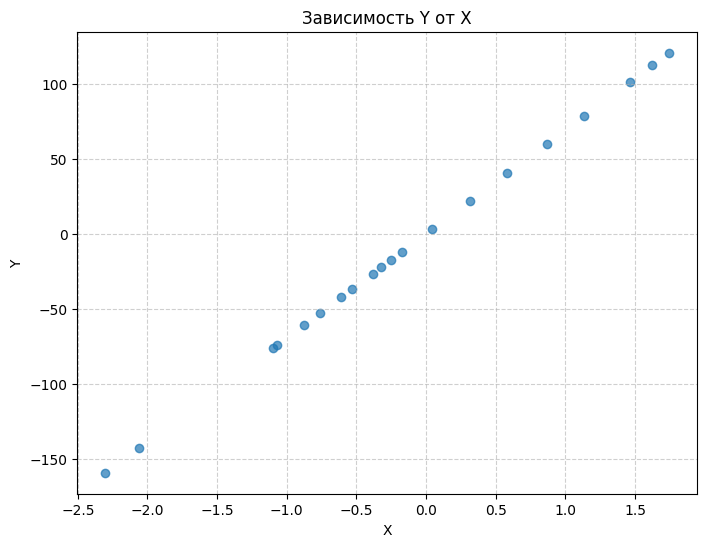

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Зависимость Y от X')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        """Предсказывает Y по X"""
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        """Вычисляет среднеквадратическую ошибку (MSE)"""
        return np.sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        """
        Реализует градиентный спуск для обучения модели.
        Возвращает историю шагов и ошибок.
        """
        steps, errors = [], []
        
        for step in range(1, max_steps + 1):
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            new_err = self.error(X, Y)
            
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

Предсказание для X=0: 0
Предсказание для X=100: 0
Начальная ошибка: 2937.6446


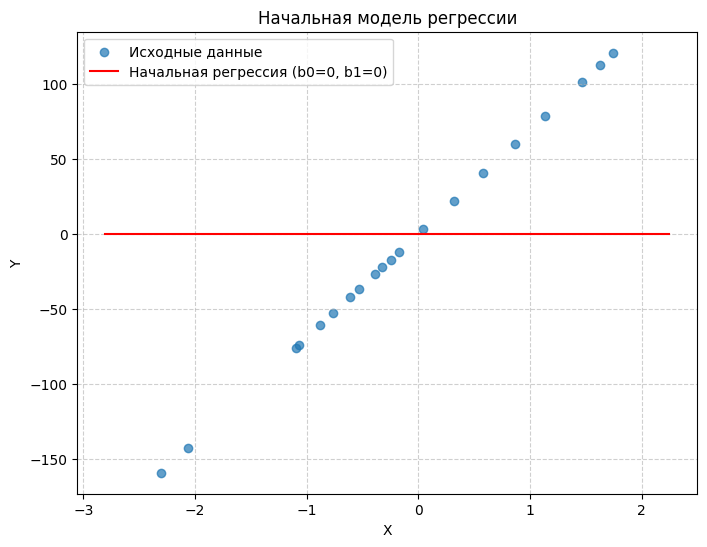

In [ ]:
hyp = Model()
print(f"Предсказание для X=0: {hyp.predict(0)}")
print(f"Предсказание для X=100: {hyp.predict(100)}")
J = hyp.error(x, y)
print(f"Начальная ошибка: {J:.4f}")

X0_plot = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
Y0_plot = hyp.predict(X0_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label='Исходные данные')
plt.plot(X0_plot, Y0_plot, 'r', label='Начальная регрессия (b0=0, b1=0)')
plt.title('Начальная модель регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Ошибка после градиентного спуска: 0.0000
Оптимальные параметры: b0=-0.0021, b1=69.1866


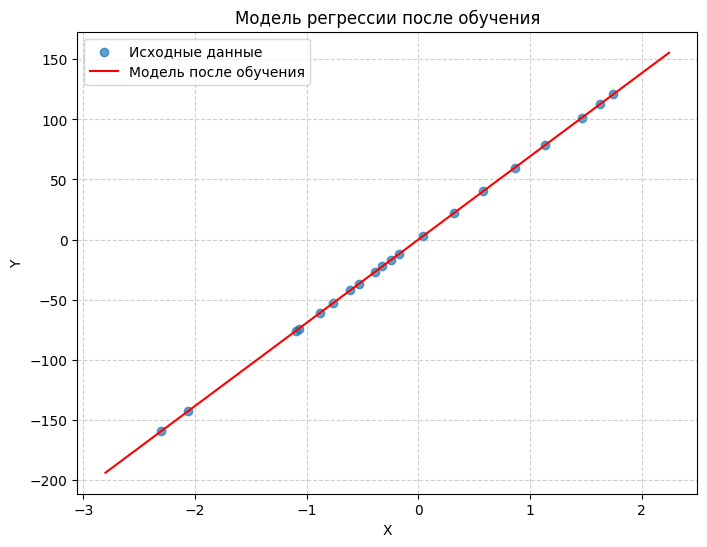

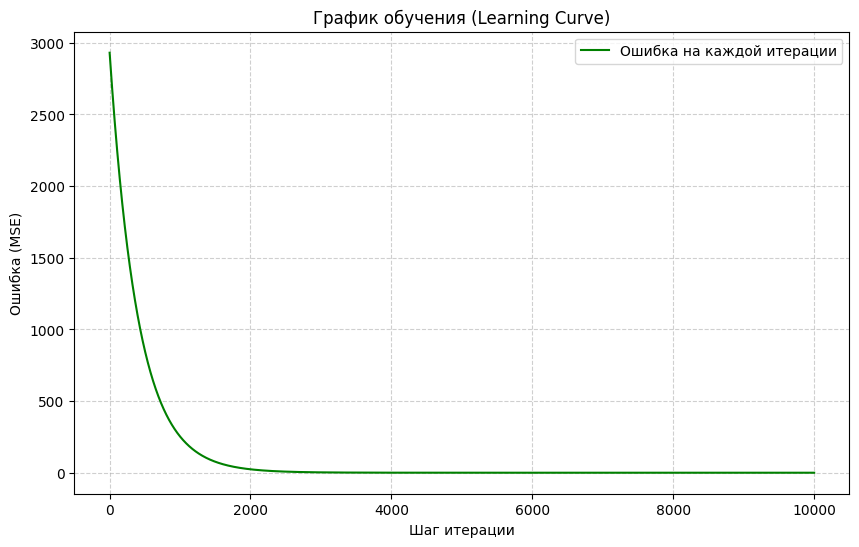

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.001, max_steps=10000)
J = hyp.error(x, y)
print(f"Ошибка после градиентного спуска: {J:.4f}")
print(f"Оптимальные параметры: b0={hyp.b0:.4f}, b1={hyp.b1:.4f}")

Y_final_plot = hyp.predict(X0_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label='Исходные данные')
plt.plot(X0_plot, Y_final_plot, 'r', label='Модель после обучения')
plt.title('Модель регрессии после обучения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(steps, errors, 'g', label='Ошибка на каждой итерации')
plt.title('График обучения (Learning Curve)')
plt.xlabel('Шаг итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


--- Тест с начальными b0=0, b1=0 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0021, b1=69.1866


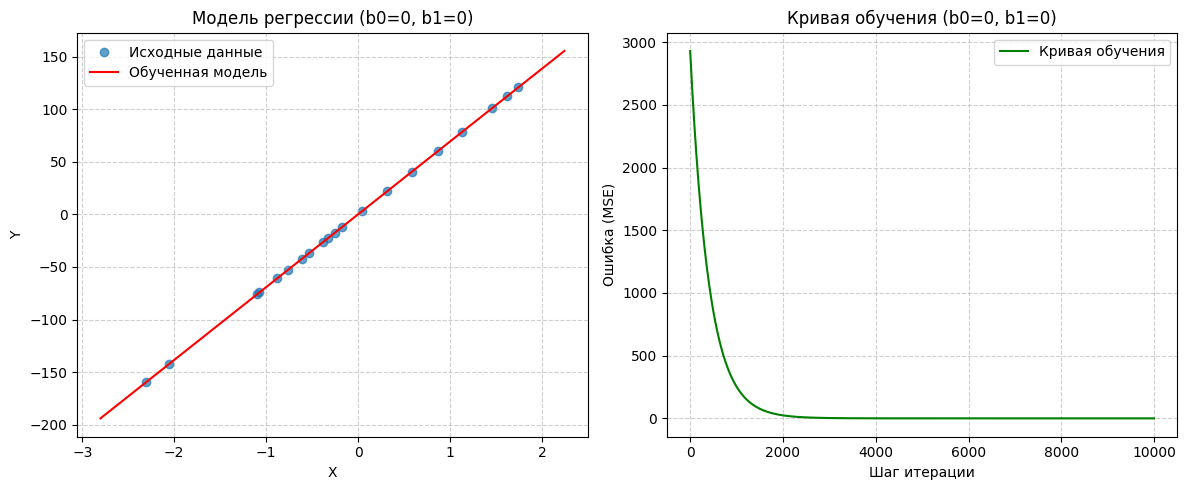


--- Тест с начальными b0=5, b1=5 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0016, b1=69.1868


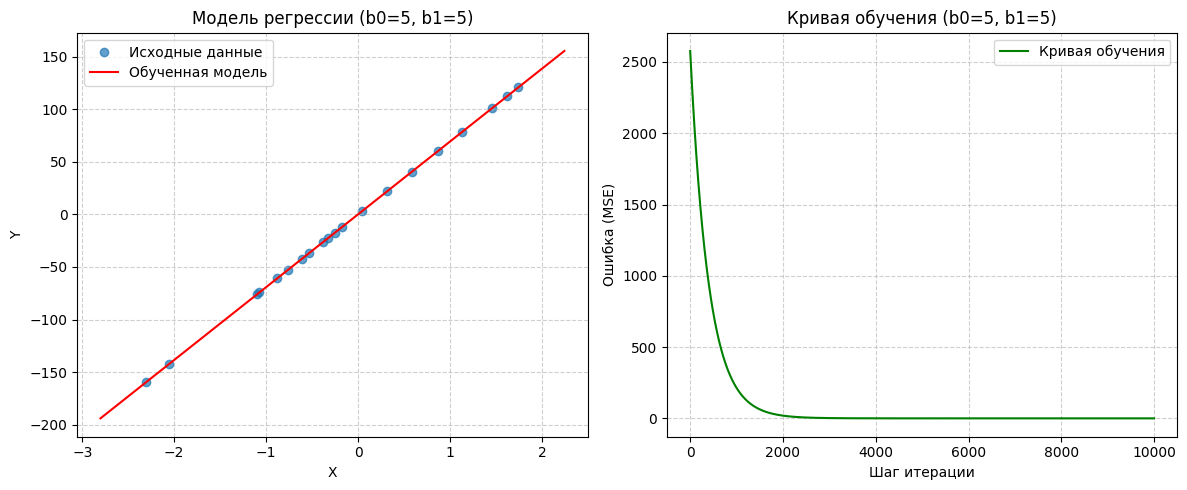


--- Тест с начальными b0=-5, b1=-5 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0026, b1=69.1863


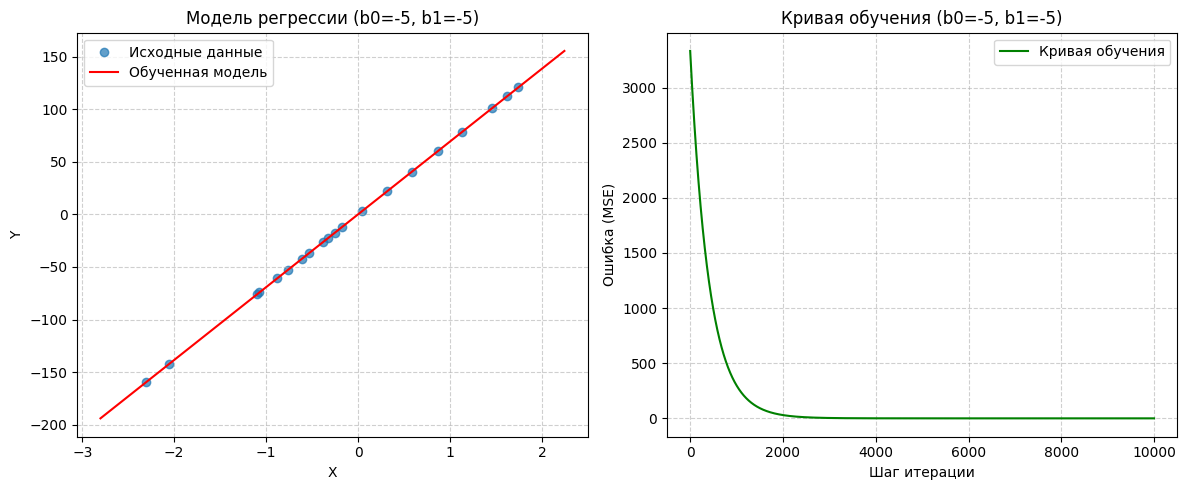


--- Тест с начальными b0=10, b1=-10 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0018, b1=69.1867


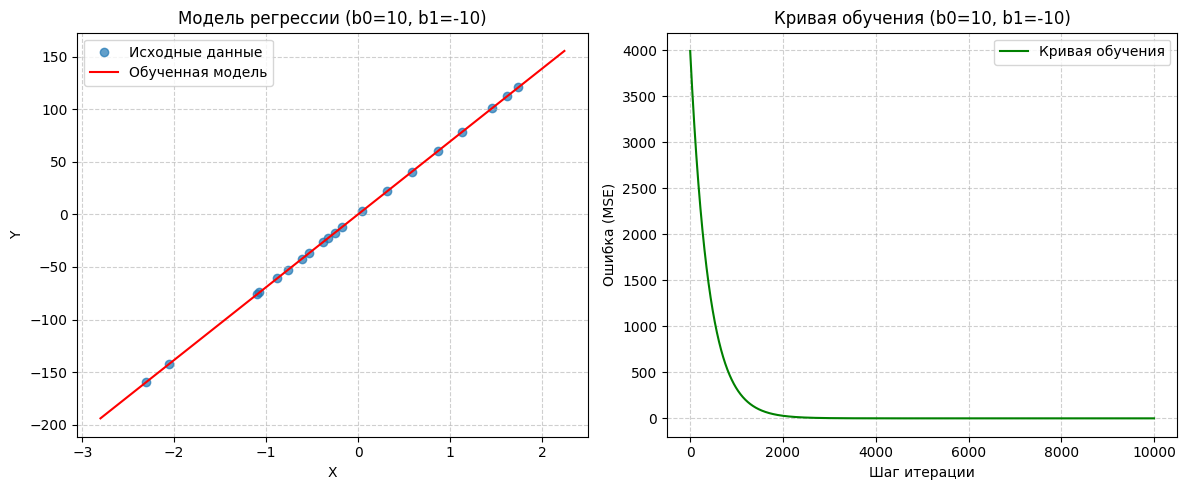


--- Вывод по проверке начальных значений ---
Как видно из графиков и значений конечной ошибки, модель сходится к примерно одинаковым оптимальным параметрам и минимальной ошибке, независимо от начальных значений b0 и b1. Это ожидаемое поведение для выпуклой функции ошибки (MSE) при использовании градиентного спуска.


In [ ]:
#1
def plot_convergence(initial_b0, initial_b1, X, Y, alpha=0.001, max_steps=10000, title_suffix=""):
    model = Model()
    model.b0 = initial_b0
    model.b1 = initial_b1
    
    steps, errors = model.fit(X, Y, alpha=alpha, max_steps=max_steps)
    final_error = model.error(X, Y)
    
    print(f"\n--- Тест с начальными b0={initial_b0}, b1={initial_b1} ---")
    print(f"Конечная ошибка: {final_error:.4f}")
    print(f"Оптимальные параметры: b0={model.b0:.4f}, b1={model.b1:.4f}")
    
    X_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100)
    Y_pred = model.predict(X_plot)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, alpha=0.7, label='Исходные данные')
    plt.plot(X_plot, Y_pred, 'r', label='Обученная модель')
    plt.title(f'Модель регрессии {title_suffix}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.subplot(1, 2, 2)
    plt.plot(steps, errors, 'g', label='Кривая обучения')
    plt.title(f'Кривая обучения {title_suffix}')
    plt.xlabel('Шаг итерации')
    plt.ylabel('Ошибка (MSE)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Тест 1: Начальные значения, близкие к 0 (стандартные)
plot_convergence(0, 0, x, y, title_suffix="(b0=0, b1=0)")

# Тест 2: Положительные начальные значения
plot_convergence(5, 5, x, y, title_suffix="(b0=5, b1=5)")

# Тест 3: Отрицательные начальные значения
plot_convergence(-5, -5, x, y, title_suffix="(b0=-5, b1=-5)")

# Тест 4: Разные знаки
plot_convergence(10, -10, x, y, title_suffix="(b0=10, b1=-10)")

print("\n--- Вывод по проверке начальных значений ---")
print("Как видно из графиков и значений конечной ошибки, модель сходится к примерно одинаковым оптимальным параметрам и минимальной ошибке, независимо от начальных значений b0 и b1. Это ожидаемое поведение для выпуклой функции ошибки (MSE) при использовании градиентного спуска.")


--- Тест с начальными b0=0, b1=0 ---
Конечная ошибка: 2292.2347
Оптимальные параметры: b0=-0.8255, b1=7.9859


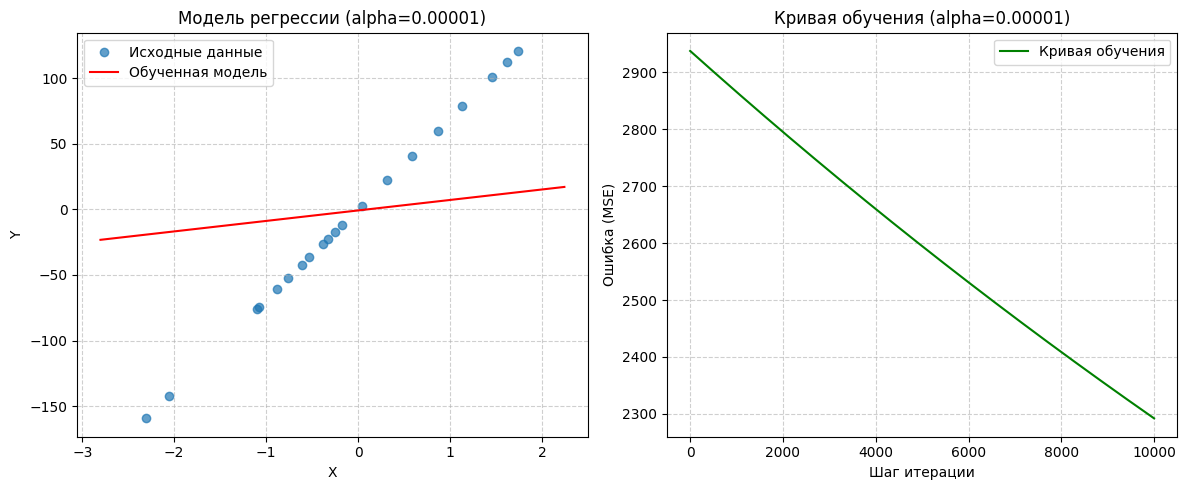


--- Тест с начальными b0=0, b1=0 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0021, b1=69.1866


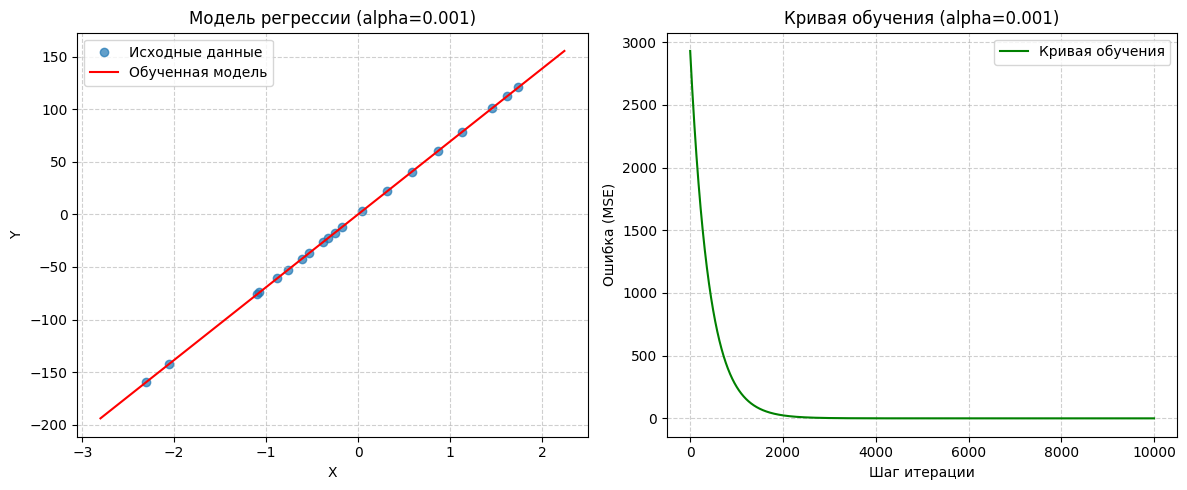


--- Тест с начальными b0=0, b1=0 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0000, b1=69.1877


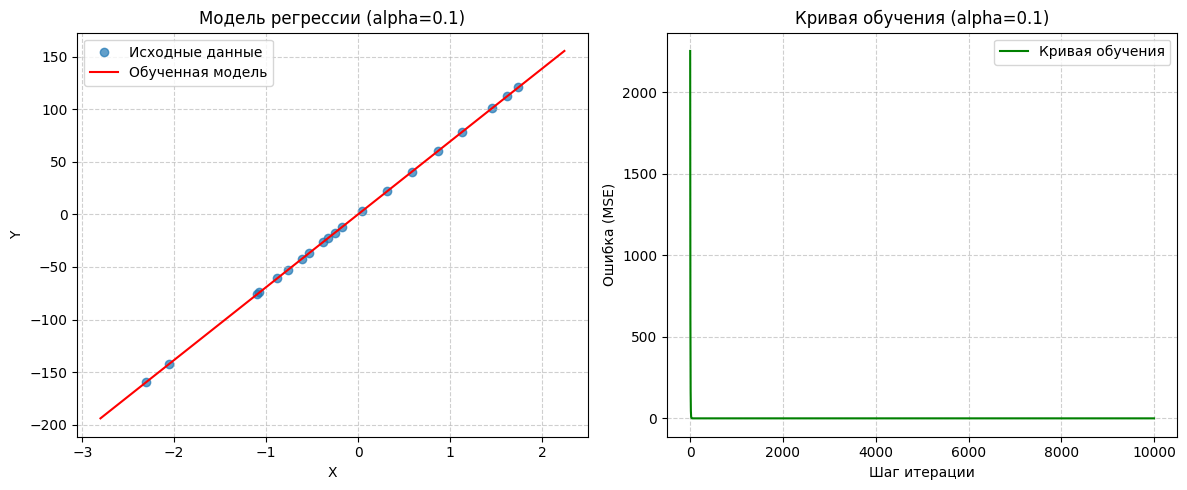


--- Тест с начальными b0=0, b1=0 ---
Конечная ошибка: 0.0000
Оптимальные параметры: b0=-0.0000, b1=69.1877


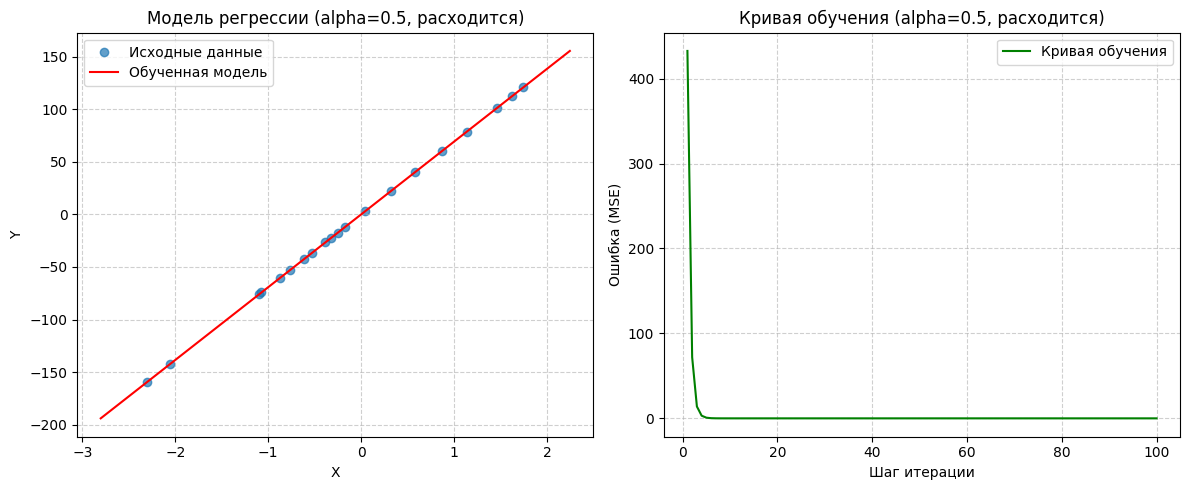


--- Вывод по проверке скорости обучения ---
При очень маленькой alpha (например, 0.00001) ошибка снижается очень медленно, и 10000 итераций может быть недостаточно для достижения оптимума.
При слишком большой alpha (например, 0.5 на этих данных) ошибка может начать колебаться, а затем резко возрастать или стать NaN/бесконечностью. Это означает, что градиентный спуск 'перескакивает' минимум и расходится.
Оптимальная alpha позволяет ошибке быстро и стабильно сходиться к минимуму.


In [ ]:
#2
# Тест 1: Очень маленькая скорость обучения (очень медленная сходимость)
plot_convergence(0, 0, x, y, alpha=0.00001, max_steps=10000, title_suffix="(alpha=0.00001)")

# Тест 2: Оптимальная скорость обучения (уже использовалась ~0.001)
plot_convergence(0, 0, x, y, alpha=0.001, max_steps=10000, title_suffix="(alpha=0.001)")

# Тест 3: Большая скорость обучения (возможна несходимость или колебания)
plot_convergence(0, 0, x, y, alpha=0.1, max_steps=10000, title_suffix="(alpha=0.1)")


plot_convergence(0, 0, x, y, alpha=0.5, max_steps=100, title_suffix="(alpha=0.5, расходится)")



print("\n--- Вывод по проверке скорости обучения ---")
print("При очень маленькой alpha (например, 0.00001) ошибка снижается очень медленно, и 10000 итераций может быть недостаточно для достижения оптимума.")
print("При слишком большой alpha (например, 0.5 на этих данных) ошибка может начать колебаться, а затем резко возрастать или стать NaN/бесконечностью. Это означает, что градиентный спуск 'перескакивает' минимум и расходится.")
print("Оптимальная alpha позволяет ошибке быстро и стабильно сходиться к минимуму.")

In [ ]:
#3
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def _prepare_input(self, data):
        """Внутренний метод для подготовки входных данных (Series или DataFrame с одним столбцом)"""
        if isinstance(data, pd.Series):
            return data.values
        elif isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец для парной регрессии.")
            return data.iloc[:, 0].values 
        else:
            return np.array(data) if not isinstance(data, np.ndarray) else data

    def predict(self, X):
        """Предсказывает Y по X"""
        X_prepared = self._prepare_input(X)
        return self.b0 + self.b1 * X_prepared

    def error(self, X, Y):
        """Вычисляет среднеквадратическую ошибку (MSE)"""
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)
        return np.sum((self.predict(X_prepared) - Y_prepared)**2) / (2 * len(X_prepared))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        """
        Реализует градиентный спуск для обучения модели.
        Возвращает историю шагов и ошибок.
        """
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)

        steps, errors = [], []
        
        for step in range(1, max_steps + 1):
            dJ0 = np.sum(self.predict(X_prepared) - Y_prepared) / len(X_prepared)
            dJ1 = np.sum((self.predict(X_prepared) - Y_prepared) * X_prepared) / len(X_prepared)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            new_err = self.error(X_prepared, Y_prepared)
            
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

print("\n--- Тестирование модифицированной модели с DataFrame ---")
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)

hyp_df = Model()
steps_df, errors_df = hyp_df.fit(x_df, y_df, alpha=0.001, max_steps=10000)
J_df = hyp_df.error(x_df, y_df)
print(f"Ошибка после градиентного спуска с DataFrame: {J_df:.4f}")
print(f"Оптимальные параметры с DataFrame: b0={hyp_df.b0:.4f}, b1={hyp_df.b1:.4f}")

hyp_series = Model()
steps_series, errors_series = hyp_series.fit(x, y, alpha=0.001, max_steps=10000)
J_series = hyp_series.error(x, y)
print(f"Ошибка после градиентного спуска с Series: {J_series:.4f}")
print(f"Оптимальные параметры с Series: b0={hyp_series.b0:.4f}, b1={hyp_series.b1:.4f}")




--- Тестирование модифицированной модели с DataFrame ---
Ошибка после градиентного спуска с DataFrame: 0.0000
Оптимальные параметры с DataFrame: b0=-0.0021, b1=69.1866
Ошибка после градиентного спуска с Series: 0.0000
Оптимальные параметры с Series: b0=-0.0021, b1=69.1866



--- Тестирование модели с условием остановки ---
Остановка на шаге 7227: изменение ошибки (0.00000100) меньше TOL (1e-06).
Ошибка после градиентного спуска (с остановкой): 0.0005
Оптимальные параметры (с остановкой): b0=-0.0274, b1=69.1689


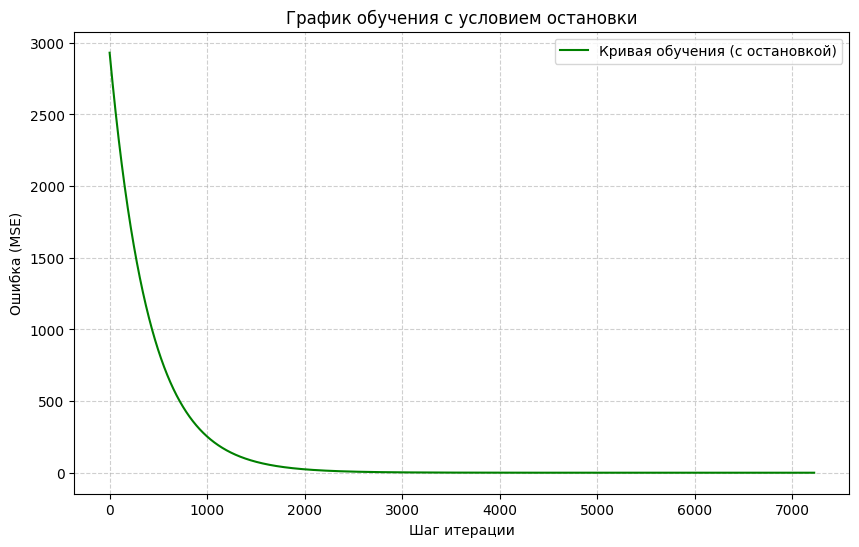

In [ ]:
#4-5

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def _prepare_input(self, data):
        if isinstance(data, pd.Series):
            return data.values
        elif isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец для парной регрессии.")
            return data.iloc[:, 0].values
        else:
            return np.array(data) if not isinstance(data, np.ndarray) else data

    def predict(self, X):
        X_prepared = self._prepare_input(X)
        return self.b0 + self.b1 * X_prepared

    def error(self, X, Y):
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)
        return np.sum((self.predict(X_prepared) - Y_prepared)**2) / (2 * len(X_prepared))

    def fit(self, X, Y, alpha=0.001, max_steps=5000, tol=1e-6):
        """
        Реализует градиентный спуск с условием остановки по изменению ошибки.
        Останавливается, если изменение ошибки меньше tol, или достигнуто max_steps.
        Возвращает историю шагов и ошибок.
        """
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)

        steps, errors = [], []
        prev_err = self.error(X_prepared, Y_prepared)

        for step in range(1, max_steps + 1):
            dJ0 = np.sum(self.predict(X_prepared) - Y_prepared) / len(X_prepared)
            dJ1 = np.sum((self.predict(X_prepared) - Y_prepared) * X_prepared) / len(X_prepared)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            new_err = self.error(X_prepared, Y_prepared)
            
            steps.append(step)
            errors.append(new_err)
            
            if abs(prev_err - new_err) < tol:
                print(f"Остановка на шаге {step}: изменение ошибки ({abs(prev_err - new_err):.8f}) меньше TOL ({tol}).")
                break
            
            prev_err = new_err
        else: 
            print(f"Остановка на шаге {max_steps}: достигнуто максимальное количество шагов.")
            
        return steps, errors

print("\n--- Тестирование модели с условием остановки ---")
hyp_stop = Model()
steps_stop, errors_stop = hyp_stop.fit(x, y, alpha=0.001, max_steps=10000, tol=1e-6)
J_stop = hyp_stop.error(x, y)
print(f"Ошибка после градиентного спуска (с остановкой): {J_stop:.4f}")
print(f"Оптимальные параметры (с остановкой): b0={hyp_stop.b0:.4f}, b1={hyp_stop.b1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(steps_stop, errors_stop, 'g', label='Кривая обучения (с остановкой)')
plt.title('График обучения с условием остановки')
plt.xlabel('Шаг итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


--- Тестирование модели с адаптивной скоростью обучения ---
Остановка на шаге 10: изменение ошибки (0.00000046) меньше TOL (1e-06).
Ошибка после адаптивного градиентного спуска: 0.0000
Оптимальные параметры (адаптивная alpha): b0=0.0001, b1=69.1875


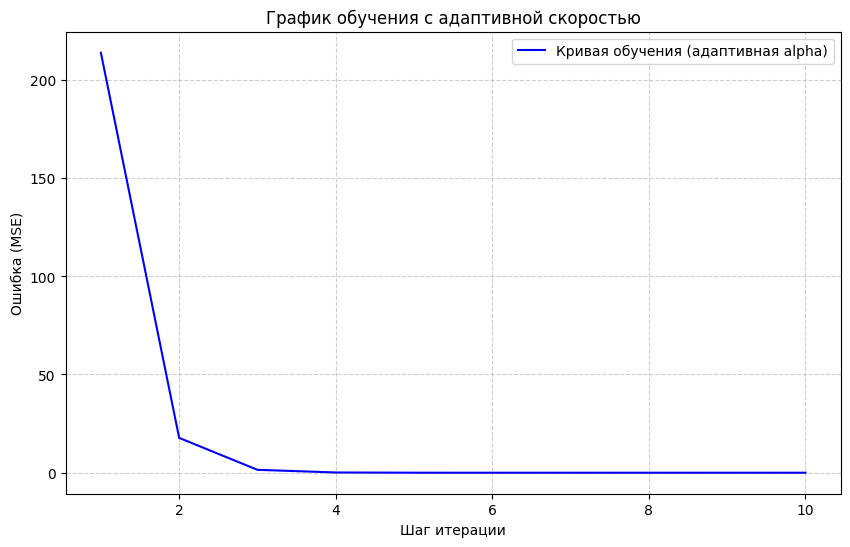

In [ ]:
#6
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def _prepare_input(self, data):
        if isinstance(data, pd.Series):
            return data.values
        elif isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец для парной регрессии.")
            return data.iloc[:, 0].values
        else:
            return np.array(data) if not isinstance(data, np.ndarray) else data

    def predict(self, X):
        X_prepared = self._prepare_input(X)
        return self.b0 + self.b1 * X_prepared

    def error(self, X, Y):
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)
        return np.sum((self.predict(X_prepared) - Y_prepared)**2) / (2 * len(X_prepared))

    def fit_adaptive(self, X, Y, initial_alpha=0.1, max_steps=5000, tol=1e-6, alpha_decay_factor=0.5):
        """
        Реализует градиентный спуск с адаптивной скоростью обучения.
        Если ошибка увеличивается, alpha уменьшается и шаг повторяется.
        """
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)

        current_alpha = initial_alpha
        steps, errors = [], []
        prev_err = self.error(X_prepared, Y_prepared)
        
        step = 0
        while step < max_steps:
            temp_b0 = self.b0
            temp_b1 = self.b1

            dJ0 = np.sum(self.predict(X_prepared) - Y_prepared) / len(X_prepared)
            dJ1 = np.sum((self.predict(X_prepared) - Y_prepared) * X_prepared) / len(X_prepared)
            
            self.b0 -= current_alpha * dJ0
            self.b1 -= current_alpha * dJ1
            
            new_err = self.error(X_prepared, Y_prepared)
            
            if new_err > prev_err and step > 0:
                current_alpha *= alpha_decay_factor
                self.b0 = temp_b0
                self.b1 = temp_b1
            else:
                step += 1
                steps.append(step)
                errors.append(new_err)

                if abs(prev_err - new_err) < tol:
                    print(f"Остановка на шаге {step}: изменение ошибки ({abs(prev_err - new_err):.8f}) меньше TOL ({tol}).")
                    break
                
                prev_err = new_err
        else:
            print(f"Остановка на шаге {max_steps}: достигнуто максимальное количество шагов.")
            
        return steps, errors

print("\n--- Тестирование модели с адаптивной скоростью обучения ---")
hyp_adaptive = Model()
steps_adaptive, errors_adaptive = hyp_adaptive.fit_adaptive(x, y, initial_alpha=1.0, max_steps=5000, tol=1e-6)
J_adaptive = hyp_adaptive.error(x, y)
print(f"Ошибка после адаптивного градиентного спуска: {J_adaptive:.4f}")
print(f"Оптимальные параметры (адаптивная alpha): b0={hyp_adaptive.b0:.4f}, b1={hyp_adaptive.b1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(steps_adaptive, errors_adaptive, 'b', label='Кривая обучения (адаптивная alpha)')
plt.title('График обучения с адаптивной скоростью')
plt.xlabel('Шаг итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


--- Тестирование метода plot_model ---


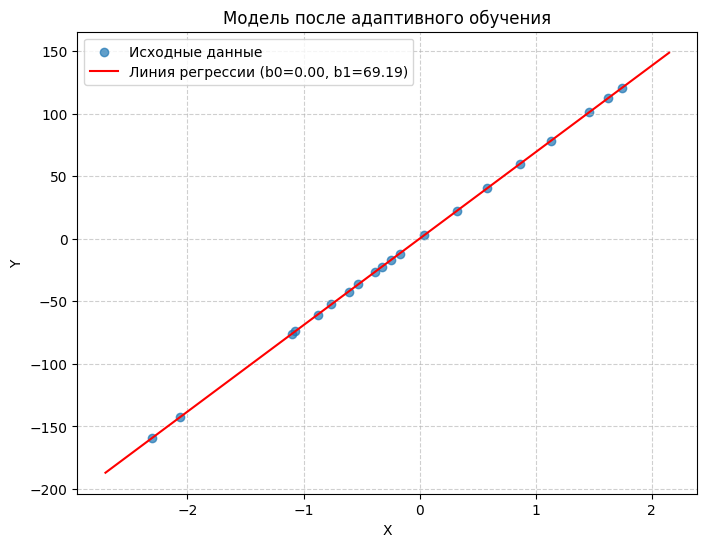

In [ ]:
#7

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def _prepare_input(self, data):
        if isinstance(data, pd.Series):
            return data.values
        elif isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError("DataFrame должен содержать ровно один столбец для парной регрессии.")
            return data.iloc[:, 0].values
        else:
            return np.array(data) if not isinstance(data, np.ndarray) else data

    def predict(self, X):
        X_prepared = self._prepare_input(X)
        return self.b0 + self.b1 * X_prepared

    def error(self, X, Y):
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)
        return np.sum((self.predict(X_prepared) - Y_prepared)**2) / (2 * len(X_prepared))

    def fit(self, X, Y, alpha=0.001, max_steps=5000, tol=1e-6):
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)

        steps, errors = [], []
        prev_err = self.error(X_prepared, Y_prepared)

        for step in range(1, max_steps + 1):
            dJ0 = np.sum(self.predict(X_prepared) - Y_prepared) / len(X_prepared)
            dJ1 = np.sum((self.predict(X_prepared) - Y_prepared) * X_prepared) / len(X_prepared)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            new_err = self.error(X_prepared, Y_prepared)
            
            steps.append(step)
            errors.append(new_err)
            
            if abs(prev_err - new_err) < tol:
                break
            
            prev_err = new_err
        else:
            pass 
            
        return steps, errors
    
    def fit_adaptive(self, X, Y, initial_alpha=0.1, max_steps=5000, tol=1e-6, alpha_decay_factor=0.5):
        X_prepared = self._prepare_input(X)
        Y_prepared = self._prepare_input(Y)

        current_alpha = initial_alpha
        steps, errors = [], []
        prev_err = self.error(X_prepared, Y_prepared)
        
        step = 0
        while step < max_steps:
            temp_b0 = self.b0
            temp_b1 = self.b1

            dJ0 = np.sum(self.predict(X_prepared) - Y_prepared) / len(X_prepared)
            dJ1 = np.sum((self.predict(X_prepared) - Y_prepared) * X_prepared) / len(X_prepared)
            
            self.b0 -= current_alpha * dJ0
            self.b1 -= current_alpha * dJ1
            
            new_err = self.error(X_prepared, Y_prepared)
            
            if new_err > prev_err and step > 0:
                current_alpha *= alpha_decay_factor
                self.b0 = temp_b0
                self.b1 = temp_b1
            else:
                step += 1
                steps.append(step)
                errors.append(new_err)

                if abs(prev_err - new_err) < tol:
                    break
                
                prev_err = new_err
        else:
            pass
            
        return steps, errors

    def plot_model(self, X, Y, title='Модель регрессии'):
        """
        Рисует график исходных данных и линии регрессии.
        Автоматически определяет масштаб осей X.
        """
        X_prepared = self._prepare_input(X)
        
        x_min, x_max = X_prepared.min(), X_prepared.max()
        x_plot = np.linspace(x_min - 0.1 * (x_max - x_min), x_max + 0.1 * (x_max - x_min), 100)
        y_plot = self.predict(x_plot)
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X_prepared, self._prepare_input(Y), alpha=0.7, label='Исходные данные')
        plt.plot(x_plot, y_plot, 'r', label=f'Линия регрессии (b0={self.b0:.2f}, b1={self.b1:.2f})')
        plt.title(title)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

print("\n--- Тестирование метода plot_model ---")
hyp_final = Model()
steps_final, errors_final = hyp_final.fit_adaptive(x, y, initial_alpha=1.0, max_steps=5000, tol=1e-6)
hyp_final.plot_model(x, y, title='Модель после адаптивного обучения')